### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Agumentation


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 1]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 22 de Noviembre. Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Feed Forward para Airbnb
* 2 - Reconocimiento de Imagenes en CIFAR10    
* 3 - Reconocimiento de frutas y verduras

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

_________________________

# 2 - Reconocimiento de Imagenes en CIFAR10

Una de las areas donde las redes neuronales han obtenido desempeños decisivamente superiores al resto de los métodos existentes en su momento es en el reconocimiento de imagenes. La capacidad de las redes convolucionaes de aprender y extraer patrones sobre patrones hasta obtener caracteristicas de alto nivel representativas de atributos buscados en las imaganes ha permitido en desempeños superiores a los obtenidos por otros métodos de aprendizaje automatico o inteligencia aritificial, e incluso en algunos casos a el desempeño humano. 

Una de las tareas usuales que se pueden resolver con redes neuronales convolucionales es la clasificación de imágenes. Uno de los _datasets_ más extendidos en la literatura para esta terea es el CIFAR10, el cual se compone de 50000 imagenes de entrenamiento de 10 clases distintas. El _dataset_ tiene un tamaño suficiente para lograr entrenar redes relativamente grandes y permite una buena introducción a este ampio campo, sobretodo por su facilidad de utilización y preprocesamiento prácticamente nulo. Durante esta pregunta utilizaremos este _dataset_ para explorar los conceptos básicos de redes convolucionales y algunas luces de problemas de clasificación. 

Note que el entrenamiento de redes convolucionales se beneficia particularmente del uso de unidades de procesamiento gráfico, por lo cual podría ser recomendable utilizarlas en caso de disponer, o considerar correr los codigos completos una vez verificado su funcionamiento en una sesión de Collab acelerada por GPU, entre otras opciones de GPU en la nube existentes. 

### 2.a Carga de datos y visualizaciones
Cargue los datos como muestra el código siguiente. Como pueden ver el dataset es tan utilizado que funciones para cargarlo vienen implementadas en keras. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (puede encontrar los nombres de las categorías en el siguiente link https://www.cs.toronto.edu/~kriz/cifar.html). ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

170500096/170498071 [==============================] - 3s 0us/step


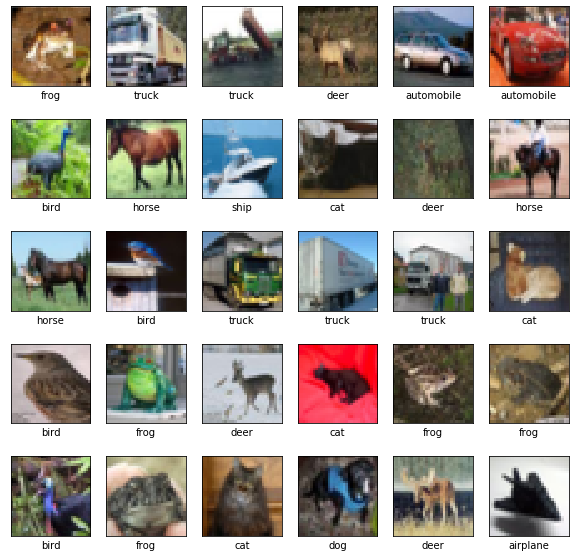

In [2]:
from keras.datasets import cifar10
(x_tr,y_tr),(x_val,y_val) = cifar10.load_data()

import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_tr[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_tr[i][0]])
plt.show()

#print(x_tr.shape)
#print(y_tr.shape)

**Respuestas**

**¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación?**

Probablemente los pares de categorías que pueden dar problemas al momento de clasificar, principalmente debido a que comparten características y visualmente son similares, son:
1. (Airplane, Ship): forma alargada similar, color similar, color del ambiente de fondo similar (cielo y mar)
2. (Automobile, Truck): ruedas, puertas, ventanas, color de pintura, luces, parachoque, espejos.
3. (Cat, Dog): cuadrúpedos, pelaje esponjoso, color de pelaje similar.
4. (Deer, Horse): cuadrúpedos, pelaje corto, color de pelaje similar.

**¿Qué tan bien cree que se desempeñaría un humano en esta tarea?**

Un humano debería ser capaz de reconocer la mayoría de las imágenes, teniendo un cierto grado de dificultad debido a la calidad reducida de lás imágenes. De tener las imágenes en una calidad mayor, un humano no debería tener problemas en clasificar las imágenes de manera correcta.


### 2.b Ligero preprocesamiento

Este _dataset_ viene tan bien preprocesado, con las clases balanceadas, el set de validación a parte y todas las imagenes de la misma dimensión que no será necesario gran preprocesamiento. Simplementen transformaremos la escala de las imagenes, de $[0,255]$ a $[-1,1]$. Para esto simplemente se puede realizar las operaciones aritmeticas que muestran en el código.

¿Perdemos información con este preprocesamiento? ¿Qué representa cada uno de los valores de la tupla `x_tr.shape`? 

¿Podemos considerar los valores de $y$ como valores numéricos o debemos transformarlos de alguna forma? 

Utilice la función `to_categorical` de keras para transformar $y$ a _encodding_ _one hot vector_. ¿Cómo se transformo el `.shape` de $y$?

In [0]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [3]:
x_tr = x_tr/127.5 - 1
print(x_tr.shape)
print("y_tr.shape antes del encodding: " + str(y_tr.shape))
y_tr = to_categorical(y_tr)
y_val = to_categorical(y_val)
print("y_tr.shape después del encodding: " + str(y_tr.shape))

(50000, 32, 32, 3)
y_tr.shape antes del encodding: (50000, 1)
y_tr.shape después del encodding: (50000, 10)


**Respuestas**

**¿Perdemos información con este preprocesamiento?** 

Es importante destacar que la pérdida de información es mínima, pues solo se está haciendo un cambio de escala. Mientras se tengan sufiecientes decimales para representar el resultado de la división de manera precisa siempre se puede volver a la escala original [0,255].

**¿Qué representa cada uno de los valores de la tupla `x_tr.shape`?** 

Los valores que se encuentran en la tupla `x_tr.shape` son datos de la forma de cada imagen y siguen el siguiente orden: altura de la imagen en pixeles, ancho imagen en pixeles, canales de colores de la imagen. En el caso de nuestro conjunto de entrenamiento, las imágenes son de 32x32 pixeles y los canales de colores son los RBG (rojo, azul y verde por sus siglas en inglés) representados por el valor numérico 3.

**¿Podemos considerar los valores de $y$ como valores numéricos o debemos transformarlos de alguna forma?**

Los valores de $y$ son números que representan categorías, no son en verdad valores numéricos sino una representación de cada tipo de foto. Hay que tratarlos como si fueran categorías.

**¿Cómo se transformo el `.shape` de $y$?**

El `.shape` de $y$, luego del encoding, cambió de una matriz de 50.000x1 a una de 50.000x10, pues al hacer la transformación a _one hot vector,_ los arreglos originales cambiaron a un arreglo de 0s y un solo 1 el cual indica la etiqueta del ejemplo.

### 2.c Primera red Convolucional

Entrenaremos una primera red convolucional sobre los datos, con la mayoría de los parámetros por defecto. Cree primero la red siguiendo la estructura $C\times P\times C\times P \times D$ donde $C$ representa una capa convolucional, $P$ una capa de _Max pooling_ y $D$ una capa densa. Note que antes de la capa densa debe agregar una capa _Flatten_ que transforma los filtros a vectores que luego pueden ser utilizados por la capa densa. 

Para los parámetros de las capas, fijaremos ambas capas convolucionales con 128 filtros de $3\times 3$ sin _stride_ y _padding 'same'_ (es decir agregaremos 0 a los bordes de la imagen de tal manera que se preserve la dimiensión de la imagen al atravesar la capa; y las capas de _pooling_ tendrán tamaño y _stride_ $2\times 2$, como muestra el código. Note que al igual que en la pregunta 1, el modelo en este caso es `Sequential`, pues los valores de una capa se pasan secuencialmente a la siguiente. 

Utilice el método `.summary` del modelo para ver la cantidad de parámetros y las dimensiones de los outputs de cada capa (note que como en la primera capa especificamos el `input_shape` podemos llamar el método antes de compilar el modelo o de pasarle datos. Justifique el número parámetros y el _Output Shape_ de cada capa en función de la estructura de la red y lo aprendido en clases. 

¿Por qué la capa de salida debe tener 10 neuronas? ¿Qué operación efectua la activación _SoftMax_? ¿Qué representaría en terminos del problema el vector de salida de la red?

In [0]:
model = Sequential() 

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(32, 32 , 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax')) # output


# summary
print(model.summary())    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
Total params: 233,098
Trainable params: 233,098
Non-trainable params: 0
________________________________________________

**Justificación Número de Parámetros y Output Shape:**

Podemos calcular la cantidad de parámetros las capas conv2d siguiendo la fórmula: $(n*m*l+1)*k$, donde $n$ y $m$ son las dimensiones de los filtros, $k$ es la cantidad de filtros y $l$ son la cantidad de dimensiones del input.

*   Primera capa conv2d: $n=3$; $m=3$; $l=3$; $k=128$; la cantidad de parámetros es 3584.
*   Segunda capa conv2d: $n=3$; $m=3$; $l=128$; $k=128$; la cantidad de parámetros es 147.584.

Para la capa dense, la cantidad de parámetros depende del tamaño del input y del output: `(size_input + 1)* size_output`, en nuestro modelo la capa flatten tiene un output de tamaño 8192 (que es el input de la capa dense siguiente) y la capa dense un output de tamaño 10, por lo que la cantidad de parámetros en la capa dense es de 91.930.

Respecto al _shape_ de los outputs en las capas _conv2d_ esta sigue la fórmula $O = \frac{(W - K +2P)}{S}+1$ donde $K$ es el tamaño del filtro, $P$ es el padding, $S$ es el stride, $W$ es el input y $O$ el output. Pero como nosotros establecimos _same padding_ el _shape_ del output se mantiene excepto por la dimensionalidad/cantidad de canales, los cuales pasan a ser 128.

Las capas de _max pooling2d_ causan una reducción en el tamaño del output cuando pasan por ellas debido a la cómo funciona _max pooling_. Con pools de tamaño 2x2, escoge entre grupos de cuatro valores y deja pasar al mayor valor. Como el stride es 1, solo se reduce el tamaño del output a la mitad.


**Respuestas**

**¿Por qué la capa de salida debe tener 10 neuronas?** 

La capa de salida (output) debe tener 10 neuronas porque esa es la cantidad de categorías que existen en nuestro conjunto $y$ de entrenamiento. Cada neurona tendrá la probabilidad de que el ejemplo pertenesca a una categoría en particular.

**¿Qué operación efectua la activación _SoftMax_?**

Lo que hace _SoftMax_ es forzar que la sumatoria de todos los outputs de las neuronas de salida sea 1. La operación específica es la de normalización de los outputs, permitiendo que los outputs de cada neurona puedan interpretarse como probabilidades.

**¿Qué representaría en terminos del problema el vector de salida de la red?**

Recordando que estamos trabajando con un problema de clasificación, el vector de salida nos indica cada una de las probabilidades de que la foto utilizada como input pertenezca a cada categoría del espacio del target.



### 2.d Primer entrenamiento

Compile la red definida en el item anterior. Para esta pregunta puede usar los optimizadores configurados por defecto, y debe usar como _loss_ _Categorical Crossentropy_. ¿Por qué preferimos medir _crossentropy_ y no por ejemplo _MSE_ en este problema? Mida igualmente el _accuracy_ como se muestra en el código. 

Entrene la red hasta observar convergencia (al rededor de 20 _epochs_ usualmente) recuperando su `history`. Grafique como varia el _accuracy_ en entrenamiento y validación a lo largo del aprendizaje. ¿Qué valor representa el _accuracy_? ¿Le parece buena medida de desempeño para este problema?

In [0]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# fit. Don't forget to add validation data
history = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 208us/step - loss: 0.6523 - acc: 0.7732 - val_loss: 11.3890 - val_acc: 0.2747
Epoch 2/20
50000/50000 [==============================] - 10s 203us/step - loss: 0.5731 - acc: 0.8002 - val_loss: 11.4163 - val_acc: 0.2745
Epoch 3/20
50000/50000 [==============================] - 10s 205us/step - loss: 0.5106 - acc: 0.8230 - val_loss: 11.1722 - val_acc: 0.2929
Epoch 4/20
50000/50000 [==============================] - 10s 205us/step - loss: 0.4617 - acc: 0.8410 - val_loss: 12.0484 - val_acc: 0.2336
Epoch 5/20
50000/50000 [==============================] - 10s 205us/step - loss: 0.4067 - acc: 0.8575 - val_loss: 11.6436 - val_acc: 0.2565
Epoch 6/20
50000/50000 [==============================] - 10s 205us/step - loss: 0.3646 - acc: 0.8730 - val_loss: 11.9197 - val_acc: 0.2475
Epoch 7/20
50000/50000 [==============================] - 10s 201us/step - loss: 0.3226 - acc: 0.8866 - val_lo

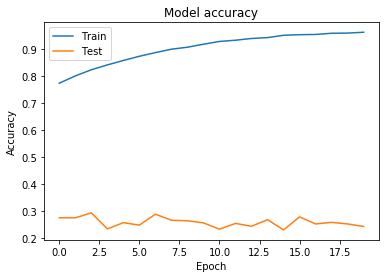

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy, First Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Respuestas**

**¿Por qué preferimos medir _crossentropy_ y no por ejemplo _MSE_ en este problema?**

Porque _cross-entropy_ es, en general, mejor para los problemas de clasificación, mientras que _mean squared error_ es, en general, mejor para los problemas de regresión. La razón de por qué esto es así se debe tanto en parte al análisis matemático como al análisis lógico. En su fórmula $(f(x_m)-y_m)^2$, _MSE_ le dá más importancia al error proveniente de de los outputs incorrectos que _cross-entropy_ donde los valores provenientes de outputs incorrectos se anulan: $-\sum y_m \ln f(x_m)$.

**¿Qué valor representa el _accuracy_?**

El _accuracy_ representa el porcentaje de predicciones que el modelo clasificó correctamente. 

**¿Le parece buena medida de desempeño para este problema?**

No es una medida de desempeño apropiada para este problema, pues el modelo busca clasificar inputs entre múltiples clases que comparten atributos similares (como se mencionó en la pregunta 2.a) por lo que es factible que el modelo pueda equivocarse al tratar de clasificar ese tipo de imágenes.

### 2.e Bloque $C\times C\times P$

Una practica usual en redes convolucionales es apilar más de un filtro convolucional antes de aplicar _pooling_. La idea detras de esto es darle mas "espacio" a la red para aprender los patrones relevantes antes de realizar el subsampleo mediante el _pooling_. En el caso de este _dataset_ también nos permite agregar más capas convolucionales sin reducir tan fuertemente la dimensión de las imagenes filtradas. Incluso muchos investigadores optan por agregar más de una capa densa el final de la red, para dar aún más libertad al modelo, pues las restricciones impuestas sobre los parámetros por la estructura convolucional parecieran restringir lo suficiente al modelo y más libertad en las capas finales no pareciera implicar un _overfitting_ tan fuerte como sería por ejemplo en una red _Fully Connected_.

Cree y entrene una red, utilizando dos bloques de dos capas convolucionales y una de _maxpool_ y luego dos capas densas, es decir $C\times C\times P \times C\times C\times P\times D \times D$. Utilice $128$ filtros $3\times 3$ en las dos primeras convolucionales y $64$ filtros $3\times 3$ en las dos siguientes. Ambas capas de _maxpool_ utilice tamaño y _stride_ $2\times 2$. 

Comente como se compara el desempeño con las redes anteriores. Apoyese de gráficos y valores numéricos. 

In [0]:
model2 = Sequential() 

model2.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(32, 32 , 3)))
model2.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(32, 32 , 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(32, 32 , 3)))
model2.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(32, 32 , 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(units=1000, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))

# summary
print(model2.summary()) 


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)             

In [0]:

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 460us/step - loss: 1.1933 - acc: 0.5708 - val_loss: 9.9147 - val_acc: 0.3657
Epoch 2/20
50000/50000 [==============================] - 22s 433us/step - loss: 0.7366 - acc: 0.7454 - val_loss: 8.3521 - val_acc: 0.4614
Epoch 3/20
50000/50000 [==============================] - 22s 432us/step - loss: 0.5003 - acc: 0.8248 - val_loss: 8.8061 - val_acc: 0.4410
Epoch 4/20
50000/50000 [==============================] - 22s 430us/step - loss: 0.2947 - acc: 0.8968 - val_loss: 8.9521 - val_acc: 0.4363
Epoch 5/20
50000/50000 [==============================] - 22s 433us/step - loss: 0.1690 - acc: 0.9425 - val_loss: 7.9054 - val_acc: 0.5017
Epoch 6/20
50000/50000 [==============================] - 22s 433us/step - loss: 0.1244 - acc: 0.9585 - val_loss: 8.4502 - val_acc: 0.4669
Epoch 7/20
50000/50000 [==============================] - 22s 432us/step - loss: 0.1022 - acc: 0.9662 - val_loss: 8.

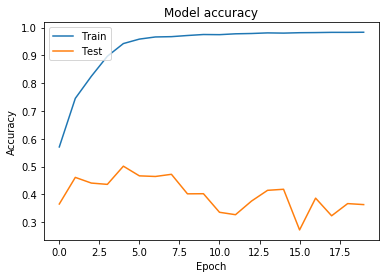

In [0]:
# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy, 2 Blocks of 2 Conv2d and 1 Maxpool layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Respuestas**

Podemos observar que el modelo con dos bloques aprender más rápido los datos de entrenamiento que el modelo anterior. También podemos observar un level aumento en el _accurary_ en los primeros _epochs_, esto puede deberse a que el modelo sufre de _overfitting._

### 2.f Exploración de profundidad

Por comodidad preferiremos quedarnos con la estructura en bloques del item anterior. En esta pregunta deberan explorar que ocurre a medida uno cambia la profundidad de la red. Para esto, entrene redes con distinto numero de bloques. Debe a lo menos entrenar una red por cada numero de bloques entre 1 y 5 bloques (¿qué particularidad tiene la red con 5 bloques? ¿Puede entrenar una más profunda?). También si lo desea puede entrenar una red con "0" bloques, es decir una red densa como las de la pregunta 1. 

Comente sobre los casos extremos (0 bloques y 5 bloques), ya sea a partir de lo aprendido en clases o lo que observa al momento de entrenar las redes. ¿Le parece alguno de los dós sea buena aproximación para reconocimiento de imagenes? Para cada red recupere `history` y grafique el valor del mejor _accuracy_ en validación y el _accuracy_ sobre entrenamiento en el mismo _epoch_ en función de la profundidad de la red, similar al procedimiento realizado en 1.g.

Queda a su discreción los parámetros de cada capa convolucional, pueden utilizar el número de filtros que estimen convenientes, solo no utilicen _stride_, y en caso de utilizar alguna regla para el número de filtros, que tal regla sea la misma para todas las profundidades (pueden ver dos posibles ejemplos en el código propuesto abajo). Para las capas de _MaxPool_ utilicen las que aparecen en el código.

Para ahorrar tiempo, si observa que una red no converge, puede detener anticipadamente el entrenamiento. Para esto es recomendable usar el _Callback_ de keras `EarlyStopping` el cual deben agregar al momento de utilizar el método `.fit` (ejemplo similar en 1.e), sin embargo asegurese de ponerle _patience_ de a lo menos 3, pues como podrá observar algunas redes empeoran su desempeño en algunas _epochs_ para luego seguir mejorando. Puede elegir monitorear la métrica que estime conveniente para esta pregunta. 

In [21]:
historyBlocks = []
for block_num in range(1,6):
    modelBlocks = Sequential() 
    for i in range(block_num):
        modelBlocks.add(Conv2D(128, (3,3),padding='same',activation='relu'))
        modelBlocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
        modelBlocks.add(MaxPooling2D(pool_size=(2, 2)))
    modelBlocks.add(Flatten())
    modelBlocks.add(Dense(units=1000, activation='relu'))
    modelBlocks.add(Dense(units=10, activation='softmax'))

    modelBlocks.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    historyBlocks.append(modelBlocks.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20))
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4560 - acc: 0.4765 - val_loss: 10.5125 - val_acc: 0.3255
Epoch 2/20
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1165 - acc: 0.6018 - val_loss: 11.6732 - val_acc: 0.2638
Epoch 3/20
50000/50000 [==============================] - 52s 1ms/step - loss: 0.8352 - acc: 0.7046 - val_loss: 10.9501 - val_acc: 0.3100
Epoch 4/20
50000/50000 [==============================] - 52s 1ms/step - loss: 0.5733 - acc: 0.8006 - val_loss: 12.0716 - val_acc: 0.2464
Epoch 5/20
50000/50000 [==============================] - 53s 1ms/step - loss: 0.3260 - acc: 0.8875 - val_loss: 11.1451 - val_acc: 0.3008
Epoch 6/20
50000/50000 [==============================] - 52s 1ms/step - loss: 0.1695 - acc: 0.9410 - val_loss: 11.5894 - val_acc: 0.2756
Epoch 7/20
50000/50000 [==============================] - 53s 1ms/step - loss: 0.1251 - acc: 0.9584 - val_loss: 11.4923 - 

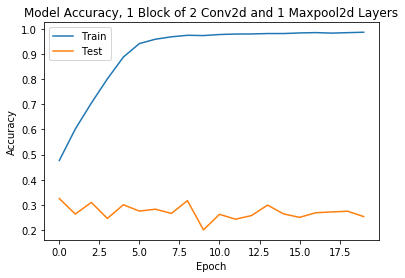

In [29]:
# Plot training & validation accuracy values
plt.plot(historyBlocks[0].history['acc'])
plt.plot(historyBlocks[0].history['val_acc'])
plt.title('Model Accuracy, 1 Block of 2 Conv2d and 1 Maxpool2d Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

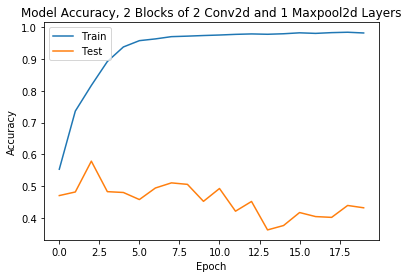

In [30]:
# Plot training & validation accuracy values
plt.plot(historyBlocks[1].history['acc'])
plt.plot(historyBlocks[1].history['val_acc'])
plt.title('Model Accuracy, 2 Blocks of 2 Conv2d and 1 Maxpool2d Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

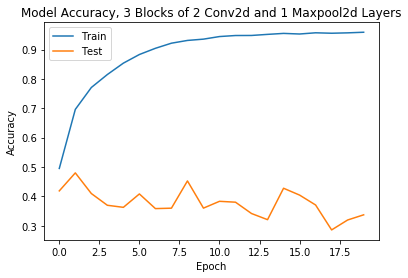

In [31]:
# Plot training & validation accuracy values
plt.plot(historyBlocks[2].history['acc'])
plt.plot(historyBlocks[2].history['val_acc'])
plt.title('Model Accuracy, 3 Blocks of 2 Conv2d and 1 Maxpool2d Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

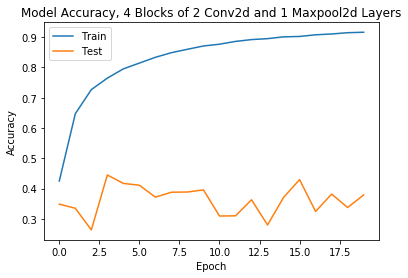

In [32]:
# Plot training & validation accuracy values
plt.plot(historyBlocks[3].history['acc'])
plt.plot(historyBlocks[3].history['val_acc'])
plt.title('Model Accuracy, 4 Blocks of 2 Conv2d and 1 Maxpool2d Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

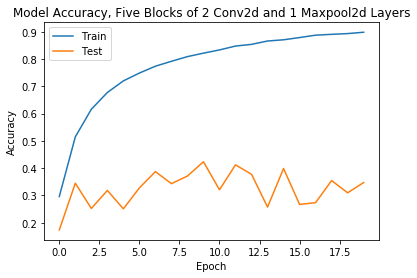

In [26]:
# Plot training & validation accuracy values
plt.plot(historyBlocks[4].history['acc'])
plt.plot(historyBlocks[4].history['val_acc'])
plt.title('Model Accuracy, 5 Blocks of 2 Conv2d and 1 Maxpool2d Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Respuestas**

**¿Qué particularidad tiene la red con 5 bloques? ¿Puede entrenar una más profunda?**

Que su accuracy parece fluctuar de a saltos entre $0.3$ y $0.4$. Una red más profunda posiblemente nos entregue un comportamiento similar. Pero, si hacemos un _summary_ de la red con 5 bloques:

In [41]:
model5Blocks = Sequential() 
model5Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu',input_shape=(32, 32 , 3)))
model5Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model5Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model5Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model5Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model5Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model5Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model5Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model5Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model5Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model5Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model5Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model5Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model5Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model5Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model5Blocks.add(Flatten())
model5Blocks.add(Dense(units=1000, activation='relu'))
model5Blocks.add(Dense(units=10, activation='softmax'))

model5Blocks.summary()


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_157 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 8, 8, 128)       

Podemos ver que el tamaño del output se ha reducido a $1 \times 1 \times128$, por lo que no se nos sería posíble continuar de la misma forma (agregando más bloques iguales).

**Comparando el modelo de 1 bloque con el de 5, ¿Le parece que alguno de los dós sea buena aproximación para reconocimiento de imagenes?**

No, ambas redes tienen una _accurary_ menor que $0.5$. Son peores clasificando que decidir a través del lanzamiento de una moneda en un problema de clasificación binaria.


### 2.g Exploración libre

Como probablemente ya habrán notado, la cantidad de hiperparámetros que se pueden fijar y explorar en una red convolucional es enorme. A parte de poder modificar la arquitectura de la red y su tamaño o profundidad, pueden en cada una de las capas modificar el número de filtros, el tamaño de los filtros; agregar _stride_, cambiar las activaciones, cambiar el _padding_, cambiar los tamaños de los _MaxPool_ o sus _strides_ o incluso modificar las capas densas al final de la red. 

Por motivos de tiempo y con la esperanza de que la tarea no sea más tediosa de lo necesario, en vez de pedir explorar cada uno de estos parámetros, se les propone elegir una exploración de la siguiente lista. Debe realizar la exploración exahustivamente, comentar sus resultados apoyandose de gráficos y su conocimiento teórico cuando sea apropiado. Independiente de la exploración elegida debe responder las preguntas finales. 

Para todas las exploraciones utilice como _template_ la mejor red entrenada hasta ahora y modifique el parámetro relevante. Si utiliza otra red, justifique brévemente su elección. 

**Exploraciones posibles (Elija 1)**
* Tamaño de los filtros: Manteniendo el filtro cuadrado, explore cambiar el tamaño de filtro de alguna(s) capas convolucionales. Debe explorar a lo menos valores de $1\times 1$ hasta $9\times 9$, por lo cual debe asegurarse realizar la exploración en una capa donde las dimensiones de los filtros de la capa anterior (o el Input de la capa) se lo permita. 
* Exploración del número de filtros: Explore variando el número de filtros de alguna(s) capas. Se recomienda explorar en potencias de 2, y debe explorar a lo menos 10 valores distintos.
* Neuronas capa Densa: realice una exploración del número de neuronas de alguna o ambas de las capas densas. Debe explorar a lo menos 10 combinaciones distintas. Puede dejar una de las dos capas fijas y variar la otra siguiendo potencias de 2 por ejemplo. Tenga cuidado con la explosión del número de parámetros. 
* Pooling: Pruebe cambiar el tamaño de los _MaxPool_ entre $2\times 2$ a $6\times 6$. Pruebe también cambiando todas las capas por `AveragePooling2D`, realizando la misma exploración que con _MaxPool_.
* Pooling "convolucional": Una aproximación posible para reemplazar las capas de _maxpool_ es utilizando capas convolucionales con kernel $2\times 2$ y _stride_ $2\times 2$. Pruebe reemplazando las capas _maxpool_ por este tipo de capas, luego pruebe una mezcla de ambas, luego pruebe simplemente eliminando las capas de _pooling_ y agregandole _stride_ a la segunda capa de cada bloque (con _kernel size_ $2\times 2$ y $3 \times 3$). Pruebe finalmente cambiando las funciones de activación de las capas donde se realiza la disminución de dimensión, probando a lo menos activación lineal, sigmoidea y tangente hiperbólica.

**Preguntas (respondalas todas)**:
* ¿A que equivaldría utilizar tamaño de kernel $1 \times 1$?
* ¿Por qué si cambiamos el número de filtros de una capa también modificamos el número de parámetros de la siguiente capa?
* ¿En su opinión, qué metodo resumen mejor la información de una capa, _maxpool_ o _averagepool_'
* ¿Que tipo de patrones esperaría usted que se extraigan mejor con un kernel no cuadrado (por ejemplo $3\times 2$)? Apoyese de un ejemplo pequeño o una explique el fenómeno llevandolo al "extremo" (e.g. $1\times 3$)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 16, 16, 128)       16512     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 16, 16, 128)       16512     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 8, 8, 128)       

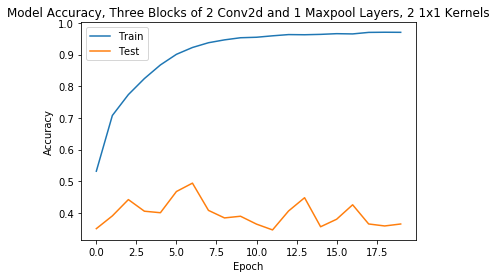

In [43]:
# Elegimos la exploración variando el tamaño de los filtros
# Utilizaremos el template de la RN con tres bloques pues tuvo el mejor
# accuracy

model3Blocks11 = Sequential() 

model3Blocks11.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks11.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks11.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks11.add(Conv2D(128, (1,1),padding='same',activation='relu'))
model3Blocks11.add(Conv2D(128, (1,1), padding='same', activation='relu'))
model3Blocks11.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks11.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks11.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks11.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks11.add(Flatten())
model3Blocks11.add(Dense(units=1000, activation='relu'))
model3Blocks11.add(Dense(units=10, activation='softmax'))

model3Blocks11.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks11.summary()) 
history3Blocks11 = model3Blocks11.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks11.history['acc'])
plt.plot(history3Blocks11.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 1x1 Kernels')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 16, 16, 128)       65664     
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 16, 16, 128)       65664     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 8, 8, 128)       

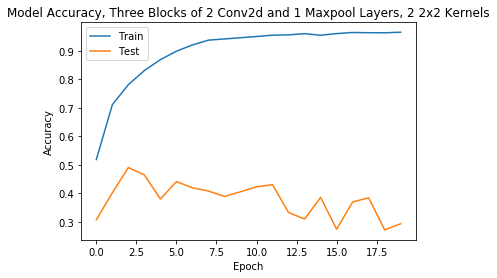

In [44]:
model3Blocks22 = Sequential() 

model3Blocks22.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks22.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks22.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks22.add(Conv2D(128, (2,2),padding='same',activation='relu'))
model3Blocks22.add(Conv2D(128, (2,2), padding='same', activation='relu'))
model3Blocks22.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks22.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks22.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks22.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks22.add(Flatten())
model3Blocks22.add(Dense(units=1000, activation='relu'))
model3Blocks22.add(Dense(units=10, activation='softmax'))

model3Blocks22.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks22.summary()) 
history3Blocks22 = model3Blocks22.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks22.history['acc'])
plt.plot(history3Blocks22.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 2x2 Kernels')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_179 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 16, 16, 128)       262272    
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 16, 16, 128)       262272    
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 8, 8, 128)       

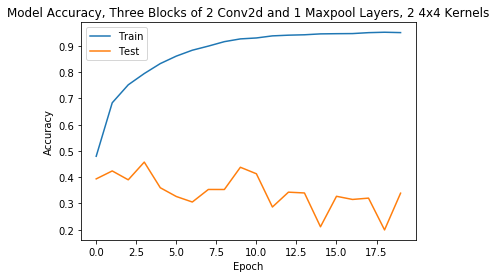

In [45]:
model3Blocks44 = Sequential() 

model3Blocks44.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks44.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks44.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks44.add(Conv2D(128, (4,4),padding='same',activation='relu'))
model3Blocks44.add(Conv2D(128, (4,4), padding='same', activation='relu'))
model3Blocks44.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks44.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks44.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks44.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks44.add(Flatten())
model3Blocks44.add(Dense(units=1000, activation='relu'))
model3Blocks44.add(Dense(units=10, activation='softmax'))

model3Blocks44.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks44.summary()) 
history3Blocks44 = model3Blocks44.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks44.history['acc'])
plt.plot(history3Blocks44.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 4x4 Kernels')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 16, 16, 128)       409728    
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 8, 8, 128)       

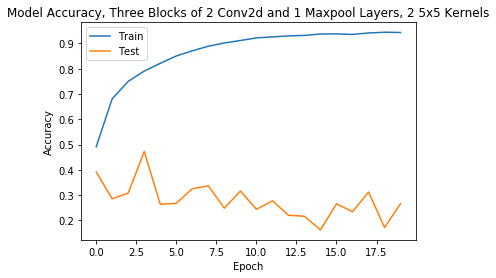

In [50]:
model3Blocks55 = Sequential() 

model3Blocks55.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks55.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks55.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks55.add(Conv2D(128, (5,5),padding='same',activation='relu'))
model3Blocks55.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model3Blocks55.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks55.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks55.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks55.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks55.add(Flatten())
model3Blocks55.add(Dense(units=1000, activation='relu'))
model3Blocks55.add(Dense(units=10, activation='softmax'))

model3Blocks55.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks55.summary()) 
history3Blocks55 = model3Blocks55.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks55.history['acc'])
plt.plot(history3Blocks55.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 5x5 Kernels')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_185 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 16, 16, 128)       802944    
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 16, 16, 128)       802944    
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 8, 8, 128)       

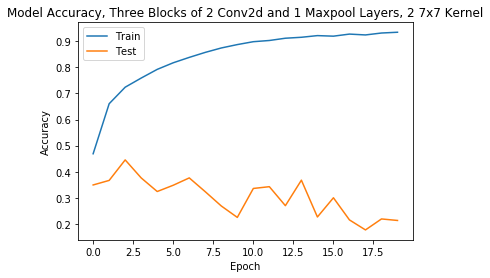

In [46]:
model3Blocks77 = Sequential() 

model3Blocks77.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks77.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks77.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks77.add(Conv2D(128, (7,7),padding='same',activation='relu'))
model3Blocks77.add(Conv2D(128, (7,7), padding='same', activation='relu'))
model3Blocks77.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks77.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks77.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks77.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks77.add(Flatten())
model3Blocks77.add(Dense(units=1000, activation='relu'))
model3Blocks77.add(Dense(units=10, activation='softmax'))

model3Blocks77.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks77.summary()) 
history3Blocks77 = model3Blocks77.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks77.history['acc'])
plt.plot(history3Blocks77.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 7x7 Kernel')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_191 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 16, 16, 128)       1048704   
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 16, 16, 128)       1048704   
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 8, 8, 128)       

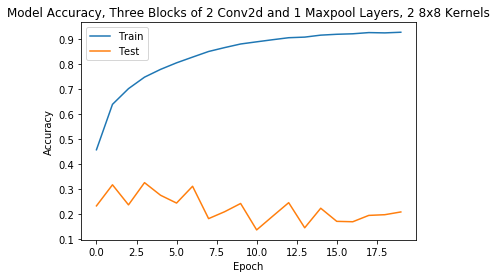

In [47]:
model3Blocks88 = Sequential() 

model3Blocks88.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks88.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks88.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks88.add(Conv2D(128, (8,8),padding='same',activation='relu'))
model3Blocks88.add(Conv2D(128, (8,8), padding='same', activation='relu'))
model3Blocks88.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks88.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks88.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks88.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks88.add(Flatten())
model3Blocks88.add(Dense(units=1000, activation='relu'))
model3Blocks88.add(Dense(units=10, activation='softmax'))

model3Blocks88.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks88.summary()) 
history3Blocks88 = model3Blocks88.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks88.history['acc'])
plt.plot(history3Blocks88.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 8x8 Kernels')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_197 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 16, 16, 128)       1327232   
_________________________________________________________________
conv2d_200 (Conv2D)          (None, 16, 16, 128)       1327232   
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 8, 8, 128)       

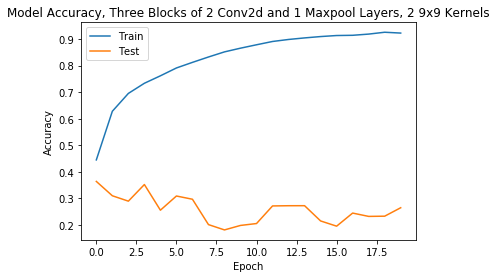

In [48]:
model3Blocks99 = Sequential() 

model3Blocks99.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks99.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks99.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks99.add(Conv2D(128, (9,9),padding='same',activation='relu'))
model3Blocks99.add(Conv2D(128, (9,9), padding='same', activation='relu'))
model3Blocks99.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks99.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks99.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks99.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks99.add(Flatten())
model3Blocks99.add(Dense(units=1000, activation='relu'))
model3Blocks99.add(Dense(units=10, activation='softmax'))

model3Blocks99.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks99.summary()) 
history3Blocks99 = model3Blocks99.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.plot(history3Blocks99.history['acc'])
plt.plot(history3Blocks99.history['val_acc'])
plt.title('Model Accuracy, Three Blocks of 2 Conv2d and 1 Maxpool Layers, 2 9x9 Kernels')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Comentarios**

Por lo que se puede ver en los gráficos, los mejores resultados se obtienen con kernes de tamaño $1 \times1$ y $2\times 2$. En estos modelos el _accurary_ semi-estbable alrededor de $0.4$, mientras que el resto de los modelos el _accurary_ comienza a descender a medida que se repite el el conjunto de evaluación. En $4 \times 4$ y $5 \times 5$ se puede ver un rápido declive del _accuracy_, llegando hasta quedar por debajo de $0.2$ luego del 17-avo _epoch_. 

Puede que sea beneficioso utilizar filtros pequeños para este tipo de problemas. 

**Respuestas**

**¿A que equivaldría utilizar tamaño de kernel $1 \times 1$?**
  
  Equivale a controlar la profundidad del input a medida que pasa por la capa, pues la profundidad del output queda determinado por la cantidad de filters que hay en la capa _conv_ 1x1.

**¿Por qué si cambiamos el número de filtros de una capa también modificamos el número de parámetros de la siguiente capa?**

Porque la cantidad de canales en el output de una capa _conv2d_ depende de la cantidad de filtros que tiene la capa, y un cambio en la cantidad de canales en el input de la siguiente capa causa un cambio en la cantidad de parámetros (por fórmula)

**¿En su opinión, qué metodo resumen mejor la información de una capa, _maxpool_ o _averagepool_?**

Para este problema de clasificación de imágenes, donde las imágenes son pequeñas, _maxpool_ es mejor, pues al conservar los valores máximos la imagen conserva sus características más agudas y prominentes, en cambio _averagepool_ causa que la imagen se vea mas difuminosa, lo que debería resultar en problemas para identificar características.

**¿Que tipo de patrones esperaría usted que se extraigan mejor con un kernel no cuadrado (por ejemplo $3\times 2$)? Apoyese de un ejemplo pequeño o una explique el fenómeno llevandolo al "extremo" (e.g. $1\times 3$)**

Considerando un ejemplo extremo, un kernel de tamaño $10\times 1$ sería mejor al trabajar con imágenes de colores en degrades vertical, pues la mayoría de los cambios importantes que ocurren en los pixeles de la imagen ocurren en eje vertical.

### 2.h Dropout
Como vimos en la pregunta 1, _dropout_ es una técnica de regularización muy util para evitar overfitting. En el caso de convolucionales, aplicaremos _dropout_ en las capas densas al final. ¿Cree que es una buena idea aplicar _dropout_ en las capas convolucionales? ¿Por qué?

Entrene la mejor red que ha entrenado hasta ahora, agregando _dropout_ en a lo menos una de las capas densas. Donde aplique _dropout_ aumente el número de neuronas. Utilice parámetro 0.5. Reporte sus resultados apoyandose de gráficos. Recuerde que las redes con _dropout_ toman más tiempo en entrenar.

In [18]:
from keras.layers import Dropout

model3BlocksDropout = Sequential() 

model3BlocksDropout.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3BlocksDropout.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3BlocksDropout.add(MaxPooling2D(pool_size=(2, 2)))

model3BlocksDropout.add(Conv2D(128, (1,1),padding='same',activation='relu'))
model3BlocksDropout.add(Conv2D(128, (1,1), padding='same', activation='relu'))
model3BlocksDropout.add(MaxPooling2D(pool_size=(2, 2)))

model3BlocksDropout.add(Dropout(0.5))

model3BlocksDropout.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3BlocksDropout.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3BlocksDropout.add(MaxPooling2D(pool_size=(2, 2)))

model3BlocksDropout.add(Flatten())
model3BlocksDropout.add(Dense(units=1000, activation='relu'))
model3BlocksDropout.add(Dense(units=10, activation='softmax'))

model3Blocks.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3BlocksDropout.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 128)       16512     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 128)       16512     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 128)        

In [19]:
model3BlocksDropout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3BlocksDropout = model3BlocksDropout.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 22s 430us/step - loss: 1.3445 - acc: 0.5104 - val_loss: 10.1394 - val_acc: 0.3510
Epoch 2/20
50000/50000 [==============================] - 20s 409us/step - loss: 0.8965 - acc: 0.6816 - val_loss: 9.4324 - val_acc: 0.3960
Epoch 3/20
50000/50000 [==============================] - 21s 410us/step - loss: 0.7457 - acc: 0.7383 - val_loss: 9.6229 - val_acc: 0.3798
Epoch 4/20
50000/50000 [==============================] - 21s 411us/step - loss: 0.6376 - acc: 0.7768 - val_loss: 8.8591 - val_acc: 0.4303
Epoch 5/20
50000/50000 [==============================] - 21s 415us/step - loss: 0.5564 - acc: 0.8028 - val_loss: 8.1325 - val_acc: 0.4797
Epoch 6/20
50000/50000 [==============================] - 21s 414us/step - loss: 0.4895 - acc: 0.8261 - val_loss: 10.2880 - val_acc: 0.3461
Epoch 7/20
50000/50000 [==============================] - 21s 414us/step - loss: 0.4247 - acc: 0.8494 - val_loss: 

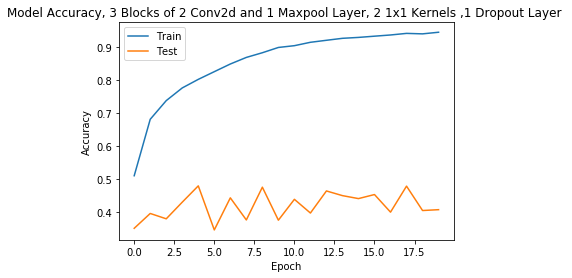

In [49]:
# Plot training & validation accuracy values
plt.plot(history3BlocksDropout.history['acc'])
plt.plot(history3BlocksDropout.history['val_acc'])
plt.title('Model Accuracy, 3 Blocks of 2 Conv2d and 1 Maxpool Layer, 2 1x1 Kernels ,1 Dropout Layer ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Respuestas**

**¿Cree que es una buena idea aplicar dropout en las capas convolucionales? ¿Por qué?**

No, porque la idea de dropout es botar aleatoriamente neuronas en una red muy conectada para reducir overfitting, pero las capas convolucionales ya tienen de por sí menos parámetros que el resto por lo que requieren de menos regularización. 





### 2.i Data Augmentation

Otra manera de evitar sobreajuste y mejorar los desempeños de una red convolucionar es usar aumentación de datos. La idea detras de este método es un hecho muy simple: si rotamos ligeramente una foto por ejemplo de un caballo, seguirá siendo de un caballo. Lo mismo si la movemos ligeramente hacia algun lado, hacia arriba, _etc_.

Keras trae implementado un generador de imagenes aumentadas, puede basarse en el código abajo para utilizarlo, aunque si lo desea o estima conveniente puede cambiar alguno de los parametros. Entrene a completitud la mejor red que obtuvo a lo largo de toda la tarea. ¿Qué tanto mejora el desempeño de la red utilizando aumentación de datos? 

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(x_tr)


model3Blocks = Sequential() 

model3Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu', input_shape=(32, 32 , 3)))
model3Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks.add(Conv2D(128, (1,1),padding='same',activation='relu'))
model3Blocks.add(Conv2D(128, (1,1), padding='same', activation='relu'))
model3Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks.add(Dropout(0.5))

model3Blocks.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model3Blocks.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3Blocks.add(MaxPooling2D(pool_size=(2, 2)))

model3Blocks.add(Flatten())
model3Blocks.add(Dense(units=1000, activation='relu'))
model3Blocks.add(Dense(units=10, activation='softmax'))

model3Blocks.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
print(model3Blocks.summary())

history = model3Blocks.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32),
                    epochs=50,
                    verbose=2,
                    validation_data=(x_val,y_val),
                    validation_freq=1,
                    shuffle=True)

# . . .

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 128)       16512     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 128)       16512     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 128)        

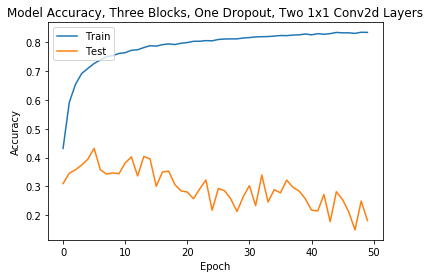

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy, Three Blocks, One Dropout, Two 1x1 Conv2d Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Respuestas**

**¿Qué tanto mejora el desempeño de la red utilizando aumentación de datos?**

Peculiarmente, el desempeño del modelo no mejora. Podemos observar que este modelo no logra clasificar correctamente el _input_ de entrenamiento (se queda estancado en $0.8$) y el _accuracy_ tiende a bajar a a medida que volvemos a recorrer el conjunto de entrenamiento.

### 2.j Matriz de Confusión

Si bien el _accuracy_ nos ha acompañado toda la pregunta para evaluar el desempeño de nuestras redes de forma fácilmente interpretable, no considera por ejemplo si una gran parte de los errores provienen de una sola clase, o si alguna clase se logra clasificar perfectamente. Una manera de visualizar fácilmente esta métrica más granular, es utilizando la matriz de confusión. Investigue y explique brévemente en qué consiste una matriz de confusión (puede explicar el caso binario donde solo hay dos clases).

Luego, apoyándose en los códigos de abajo, visualizaremos la matriz de confusión del modelo que mejor se desempeñó a lo largo de toda la tarea. 

- ¿Algo le llama la atención? 
- ¿Qué clases se confunden más entre si?
- ¿Coincidió esto con sus predicciones al inicio de la tarea? 

Igual de la misma forma que en 2.a, visualice algunas imagenes mal clasificadas por su modelo. 
- ¿Le parece razonable que el modelo no las clasifique bien?

**¿En qué consiste una matriz de confusión?**

Una matriz de confusión es un resumen de los resultados de predicción sobre un problema de clasificación. El número de predicciones correctas e incorrectas se resume con valores de conteo y se desglosa por clase.

La matriz de confusión muestra las formas en que el modelo de clasificación se confunde cuando hace predicciones. Brinda información no solo sobre los errores que está cometiendo el clasificador, sino que también sobre los tipos de errores que se están cometiendo.


In [0]:
from sklearn.metrics import confusion_matrix
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
import seaborn as sns

scores = model3BlocksDropout.predict(x_val)

sns.heatmap(confusion_matrix(y_val, scores))

### 2.k Visualizaciones

Ahora, si bien vemos que nuestras redes se han comportado relativamente bien en esta tarea, no podríamos decir exactamente por qué. Una forma de acercarnos a entende aproximadamente que está haciendo la red es visualizando los pesos y viendo como se transforma una imagen a medida pasa por la red. 

Utilizando su red de mejor desempeño, represente gráficamente los pesos de las distintas capas, a lo menos de la primera y la última capa convolucional. Recuerde que puede obtener los pesos de una capa como se presenta en el item 1.k, teniendo atención que en este caso los pesos se presentarán como un array de los kernels.

Luego, de alguna clase elija unas imagenes al azar y grafíque los filtros que la red extrae a partir de la imagen a lo largo que esta pasa por las capas. Puede utilizar la función propuesta abajo para obtener el modelo truncado, luego con `.predict` obtendrá la imagen filtrada que busca. Nuevamente ponga énfasis en la primera y ultima capa. Elija otra clase y repita el proceso. Comente. 

In [0]:
weights = []
weights.append(model3BlocksDropout.layers[0].get_weights())
weights.append(model3BlocksDropout.layers[8].get_weights())

print(weights[0])

In [0]:
imgs = []
i = 0
while(imgs.size() < 3):
    if(y_tr[i][1] == 1):
        imgs.add(x_tr[i])

plt.figure()
plt.imshow(imgs[0], cmap=plt.cm.binary)
plst.show()


In [0]:
def get_n_layers(max_layer, original_model):
    truncated_model = Sequential()
    for layer in range(max_layer):
        truncated_model.add(original_model.get_layer(index=lay))
    return truncated_model

In [0]:
model1 = get_n_layers(1)
model9 = get_n_layers(9)

imgFilter1 = model1.predict(imgs[0])